   age
0   60
1   43
2   67
3   50
4   56


<AxesSubplot:>

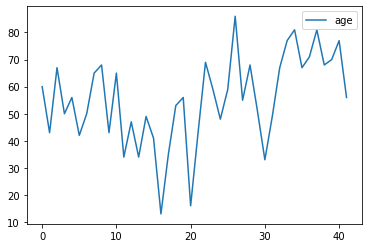

In [1]:
# 영국왕들의 수명 데이터
import pandas as pd
                                            # 해더 없음, 필드명 
df = pd.read_csv('c:/data/time/kings.dat',header=None,names=['age'])
print(df.head())
df.plot()

1    25.0
2   -40.0
3    10.0
4    20.0
dtype: float64


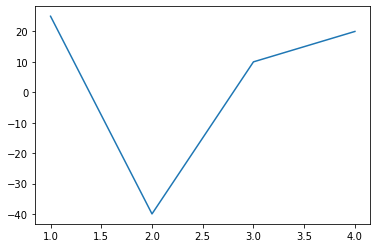

In [2]:
import matplotlib.pyplot as plt
a=pd.Series([1025,1050,1010,1020,1040])
b=a.diff(periods=1).iloc[1:]
print(b)
plt.plot(b)

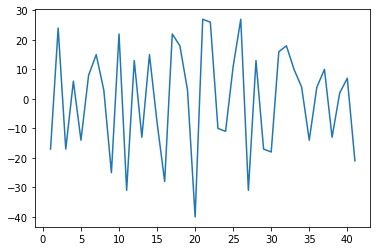

In [3]:
diff1=df['age'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
# 로그 후 차분한 자료를 adfuller함수로 안정적인 시계열인지 확인
diff1=np.log(df['age']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# p-value가 0.05보다 작으므로 95%신뢰수준 하에서 유의함 (안정적인 시계열 자료임)

(-7.446856429613951, 5.807660899733685e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.20496009678498)
ADF Statistic: -7.446856
p-value: 0.000000


In [5]:
from pmdarima.arima import auto_arima
model = auto_arima(df)
model
# arima(0,1,1)

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# 학습용, 검증용 구분
train = df[:30]
test = df[30:]
print(len(df['age']))
print(df['age'].values)
print(df['age'].values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]


In [7]:
# arima(1,2,1)을 수행할 경우 order=c(1,2,1)로 모형을 생성함
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(0,1,1)).fit()

c:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [8]:
# 예측값
fore = model.forecast(steps=5)
print(fore)
# 예측값, stderr, upper bound, lower bound
#59.5232655 , 59.71740725, 59.911549 , 60.10569075, 60.2998325로 예측함

(array([59.52326776, 59.71740993, 59.91155209, 60.10569426, 60.29983642]), array([15.67413934, 16.19266177, 16.6950875 , 17.18282857, 17.65710194]), array([[28.80251917, 90.24401636],
       [27.98037604, 91.45444382],
       [27.18978188, 92.6333223 ],
       [26.4279691 , 93.78341941],
       [25.69255254, 94.9071203 ]]))
